# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
billboards_data = pd.read_csv('/Users/Lappy9000/Dropbox/Dropbox/GA/GitHub/DSI_SM_01/projects/01-projects-weekly/project-02/assets/billboard.csv')
billboards = pd.DataFrame(billboards_data)

In [103]:
billboards.dtypes

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
x4th.week          float64
x5th.week          float64
x6th.week          float64
x7th.week          float64
x8th.week          float64
x9th.week          float64
x10th.week         float64
x11th.week         float64
x12th.week         float64
x13th.week         float64
x14th.week         float64
x15th.week         float64
x16th.week         float64
x17th.week         float64
x18th.week         float64
x19th.week         float64
x20th.week         float64
x21st.week         float64
x22nd.week         float64
x23rd.week         float64
                    ...   
x47th.week         float64
x48th.week         float64
x49th.week         float64
x50th.week         float64
x51st.week         float64
x52nd.week         float64
x

In [104]:
billboards.shape

(317, 83)

In [105]:
"""
Decided to warm up by calculating the mean, standard deviation, median, mode, variance, and range of the first 3 weeks
of chart data.
"""

'\nDecided to warm up by calculating the mean, standard deviation, median, mode, variance, and range of the first 3 weeks\nof chart data.\n'

In [106]:
first_week = billboards['x1st.week']
print "The first week mean is: "
print first_week.mean()
print "The first week Standard Deviation is: "
print first_week.std()
print "The first week median is: "
print first_week.median()
print "The first week mode is: "
print first_week.mode()
print "The first week variance is: "
print first_week.var()
first_week_range = first_week.max() - first_week.min()
print "The first week range is: "
print first_week_range

The first week mean is: 
79.9589905363
The first week Standard Deviation is: 
14.6868651898
The first week median is: 
81.0
The first week mode is: 
0    77
dtype: int64
The first week variance is: 
215.704009104
The first week range is: 
85


In [107]:
second_week = billboards['x2nd.week']
print "The second week mean is: "
print second_week.mean()
print "The second week Standard Deviation is: "
print second_week.std()
print "The second week median is: "
print second_week.median()
print "The second week mode is: "
print second_week.mode()
print "The second week variance is: "
print second_week.var()
second_week_range = second_week.max() - second_week.min()
print "The second week range is: "
print second_week_range

The second week mean is: 
71.1730769231
The second week Standard Deviation is: 
18.2004428982
The second week median is: 
73.0
The second week mode is: 
0    72.0
1    76.0
dtype: float64
The second week variance is: 
331.256121692
The second week range is: 
92.0


In [108]:
third_week = billboards['x3rd.week']
print "The third week mean is: "
print third_week.mean()
print "The third week Standard Deviation is: "
print third_week.std()
print "The third week median is: "
print third_week.median()
print "The third week mode is: "
print third_week.mode()
print "The third week variance is: "
print third_week.var()
third_week_range = third_week.max() - third_week.min()
print "The third week range is: "
print third_week_range

The third week mean is: 
65.0456026059
The third week Standard Deviation is: 
20.7523021452
The third week median is: 
66.0
The third week mode is: 
0    65.0
dtype: float64
The third week variance is: 
430.658044325
The third week range is: 
94.0


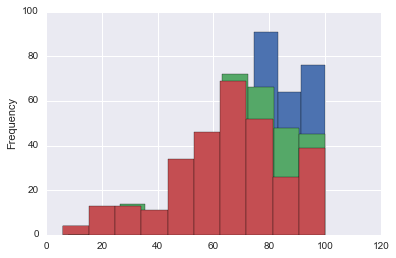

In [109]:
#this shows a histogram of the first three "week" rows data.  I just thought it was interesting to see and a good warm up.
first_week.plot(kind='hist')
second_week.plot(kind='hist')
third_week.plot(kind='hist')

In [110]:
weeks_columns = billboards.columns[6:]
weeks_columns

Index([u'date.peaked', u'x1st.week', u'x2nd.week', u'x3rd.week', u'x4th.week',
       u'x5th.week', u'x6th.week', u'x7th.week', u'x8th.week', u'x9th.week',
       u'x10th.week', u'x11th.week', u'x12th.week', u'x13th.week',
       u'x14th.week', u'x15th.week', u'x16th.week', u'x17th.week',
       u'x18th.week', u'x19th.week', u'x20th.week', u'x21st.week',
       u'x22nd.week', u'x23rd.week', u'x24th.week', u'x25th.week',
       u'x26th.week', u'x27th.week', u'x28th.week', u'x29th.week',
       u'x30th.week', u'x31st.week', u'x32nd.week', u'x33rd.week',
       u'x34th.week', u'x35th.week', u'x36th.week', u'x37th.week',
       u'x38th.week', u'x39th.week', u'x40th.week', u'x41st.week',
       u'x42nd.week', u'x43rd.week', u'x44th.week', u'x45th.week',
       u'x46th.week', u'x47th.week', u'x48th.week', u'x49th.week',
       u'x50th.week', u'x51st.week', u'x52nd.week', u'x53rd.week',
       u'x54th.week', u'x55th.week', u'x56th.week', u'x57th.week',
       u'x58th.week', u'x59th.week', u'x

##### Write a brief description of your data, and any interesting observations you've made thus far. 

In [111]:
"""This data set takes a look at the year 2000 and what tracks were on the top of the Billboard music charts.  It shows
us the name of the artist, name of the track, length of the track, genre, date entered and peaked on the billboard charts
and then breaks down the actual ranking for every week that it was on the charts.  It does this by placing each week
in a respective column and then listing the number of that tracks ranking in the column.  

Some interesting items of note thus far are the following:
    The first 'x1st.week' column returns as an integer type, whereas the rest of the week's return as float types
    The "date_entered" and "date_peaked" columns will need to be converted to DateTime in order to better call on data.
    The "year" column is really not needed as the database is focused on the year 2000.
    The "artist.inverted" column should be renamed for easier calling.
    
"""

'This data set takes a look at the year 2000 and what tracks were on the top of the Billboard music charts.  It shows\nus the name of the artist, name of the track, length of the track, genre, date entered and peaked on the billboard charts\nand then breaks down the actual ranking for every week that it was on the charts.  It does this by placing each week\nin a respective column and then listing the number of that tracks ranking in the column.  \n\nSome interesting items of note thus far are the following:\n    The first \'x1st.week\' column returns as an integer type, whereas the rest of the week\'s return as float types\n    The "date_entered" and "date_peaked" columns will need to be converted to DateTime in order to better call on data.\n    The "year" column is really not needed as the database is focused on the year 2000.\n    The "artist.inverted" column should be renamed for easier calling.\n    \n'

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

In [112]:
"""
Removing the year column because the data set is strictly the year 2000 and including that column may interfere
with data analysis and visualition.
"""
del billboards ['year']

In [113]:
"""
Removing the "x" from the column names that was placed in front of each week's column name.
I used a lambda function since the naming convention was the same across the entire column, and this accomplished my 
goal with one line of code, rather than defining every column name.
"""
billboards.rename(columns=lambda x: x.replace('x', ''), inplace=True)

In [114]:
#Replaced all "." with "_" to improve readability and make syntax more pythonic.  Used same lambda function as above.
billboards.rename(columns=lambda x: x.replace('.', '_'), inplace=True)

In [115]:
#renamed "artist_inverted" to "artist" for easier identification. Made sure to use "artist_inverted" due to prior code.
billboards.rename(columns={'artist_inverted':'artist'}, inplace=True)

In [116]:
#converting "date_entered" and "date_peaked" to datetime variables in order to better call on the data.
date_entered = pd.to_datetime(billboards['date_entered'])
date_peaked = pd.to_datetime(billboards['date_peaked'])

In [117]:
"""
I decided to convert the time column to a single integer representing seconds.  I did this by using the str.split
method to separate the two numbers representing minutes and seconds and then apply with a lambda function to combine
the two in to a total amount of seconds.  This should help me with visualizing the data.
"""
time = billboards['time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [118]:
for x in billboards.time:
    billboards['time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [119]:
billboards.head()

,artist,track,time,genre,date_entered,date_peaked,1st_week,2nd_week,3rd_week,4th_week,...,67th_week,68th_week,69th_week,70th_week,71st_week,72nd_week,73rd_week,74th_week,75th_week,76th_week
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
first_week = billboards['1st_week'].apply(float)
first_week.dtypes

dtype('float64')

In [121]:
week_columns = list(billboards.columns[6:])
clean_week_columns = [x for x in week_columns if str(x) != 'nan']

In [122]:
#This helps prove my problem statement, showing that the mean is a rather small amount of time.
time_mean = time.mean()
time_mean

242.42586750788644

In [131]:
time_std = time.std()
time_std

42.40161762074423

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [124]:
week_melt = pd.melt(billboards, id_vars='track', value_vars=list(billboards.columns[6:]), var_name='Week')
week_melt

,track,Week,value
0,Independent Women Part I,1st_week,78.0
1,"Maria, Maria",1st_week,15.0
2,I Knew I Loved You,1st_week,71.0
3,Music,1st_week,41.0
4,Come On Over Baby (All I Want Is You),1st_week,57.0
5,Doesn't Really Matter,1st_week,59.0
6,Say My Name,1st_week,83.0
7,Be With You,1st_week,63.0
8,Incomplete,1st_week,77.0
9,Amazed,1st_week,81.0


In [125]:
#I wanted to create a melted data frame that included time for my problem statement exploration.
week_melt_time = pd.melt(billboards, id_vars=['artist', 'time'], value_vars=clean_week_columns, var_name='Week')
week_melt_time

,artist,time,Week,value
0,Destiny's Child,3:38,1st_week,78.0
1,Santana,4:18,1st_week,15.0
2,Savage Garden,4:07,1st_week,71.0
3,Madonna,3:45,1st_week,41.0
4,"Aguilera, Christina",3:38,1st_week,57.0
5,Janet,4:17,1st_week,59.0
6,Destiny's Child,4:31,1st_week,83.0
7,"Iglesias, Enrique",3:36,1st_week,63.0
8,Sisqo,3:52,1st_week,77.0
9,Lonestar,4:25,1st_week,81.0


## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

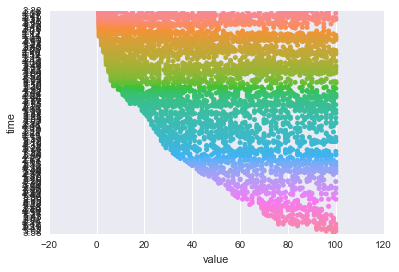

In [127]:
"""
This swarm plot attempts to find the correlation between the length of a track, and it's ranking on the billboard 
chart.  The chart indicates that shorter the track, the higher it's rank.
"""
sns.swarmplot(x='value', y= 'time', data=week_melt_time)

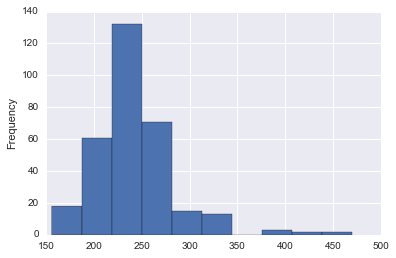

In [129]:
#This chart shows that a good amount of the tracks on the top 100 are low to medium in length.
time.plot(kind='hist')

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

In [ ]:
#Does the shorter the length of a track, increase it's probability to be on the Billboard top 100 in the year 2000?

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

In [ ]:
"""
Compare the tracks that are on the Billboard rankings the most with the length of the tracks.
Find the mean and standard deviation of the track lengths for the tracks on the Billboard list for 2000.
Attempt to find the correlation between the time of a track and it's ranking on the billboard chart. 
"""

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

In [ ]:
"""
https://cshoejazz.wordpress.com/
I am still working on getting a better blog up specifically for my data science work, so in the meantime I am using my
old retired blog.
"""

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 